In [664]:
import pandas as pd
import numpy as np

In [665]:
# # very hard to work with formatting so looks messy
# df_ipc=pd.read_excel("Data/Ethiopia - IPC Analysis 2017-2020.xlsx",header=[10,11])
# # df_ipc.columns = [f'{i} {j.replace(".2","")}' if "Unnamed" not in i else f'{j}' for i, j in df_ipc.columns ]
# df_ipcp=df_ipc[['Level 1 Name','Area',"#","Date of Analysis","Area Phase"]]
# df_ipcp=df_ipcp[df_ipcp["Area Phase"].notnull()]
# df_ipcp=df_ipcp.rename(columns={"Level 1 Name":"ADM1_EN","Area":"ADM2_EN","#":"pop_CS","Date of Analysis":"date","Area Phase":"CS"})
# df_ipcp.date=pd.to_datetime(df_ipcp.date,format="%b %Y")
# status="CS"
# for level in [1, 2, 3, 4, 5]:
#     ipc_id = "{}_{}".format(status, level)
#     df_ipcp[ipc_id] = np.where(
#         df_ipcp[status] == level,
#         df_ipcp[f"pop_{status}"],
#         (np.where(df_ipcp[status] == 99, np.nan, 0)),
#     )
# df_ipcp=df_ipcp[["date","ADM1_EN","ADM2_EN","pop_CS"]+[f"CS_{i}" for i in range(1,6)]]
# df_ipcp=df_ipcp.groupby(["date","ADM1_EN"]).agg(lambda x: np.nan if x.isnull().all() else x.sum()).reset_index()

In [666]:
df_ipcp=pd.read_csv("Data/GlobalIPC_Ethiopia_Admin1.csv",delimiter=";",thousands=".")

In [667]:
df_ipcp.rename(columns={"Date of Analysis":"date","ADMIN1":"ADM1_EN"},inplace=True)

In [673]:
df_ipcp["date"]=pd.to_datetime(df_ipcp["date"],format="%b/%y")

In [674]:
df_ipcp=df_ipcp.replace('%','', regex=True)

In [675]:
df_ipcp.columns

Index(['ADM1_EN', 'date', 'Country Population', 'pop_CS', 'CS_1', 'CS_1_perc',
       'CS_2', 'CS_2_perc', 'CS_3', 'CS_3_perc', 'CS_4', 'CS_4_perc', 'CS_5',
       'CS_5_perc', 'pop_ML1', 'ML1_1', 'ML1_1_perc', 'ML1_2', 'ML1_2_perc',
       'ML1_3', 'ML1_3_perc', 'ML1_4', 'ML1_4_perc', 'ML1_5', 'ML1_5_perc',
       'pop_ML2', 'ML2_1', 'ML2_1_perc', 'ML2_2', 'ML2_2_perc', 'ML2_3',
       'ML2_3_perc', 'ML2_4', 'ML2_4_perc', 'ML2_5', 'ML2_5_perc'],
      dtype='object')

In [676]:
df_ipcp.loc[:, ~df_ipcp.columns.isin(["ADM1_EN","date","Analysis Period"])]=df_ipcp.loc[:, ~df_ipcp.columns.isin(["ADM1_EN","date","Analysis Period"])].astype(int)

In [677]:
df_ipcp

,ADM1_EN,date,Country Population,pop_CS,CS_1,CS_1_perc,CS_2,CS_2_perc,CS_3,CS_3_perc,...,ML2_1,ML2_1_perc,ML2_2,ML2_2_perc,ML2_3,ML2_3_perc,ML2_4,ML2_4_perc,ML2_5,ML2_5_perc
0,Afar,2020-08-01,114964000,1540553,647322,42,516581,34,313370,20,...,477041,30,583797,37,426361,27,78274,5,0,0
1,Amhara,2020-08-01,114964000,6084363,3483150,57,1709456,28,682492,11,...,4341010,71,1188029,19,614339,10,0,0,0,0
2,Oromia,2020-08-01,114964000,16937642,7512571,44,5594669,33,3268079,19,...,6462340,37,5565310,32,4326308,25,948789,5,0,0
3,SNNP,2020-08-01,114964000,7404334,3582210,48,2393761,32,1112366,15,...,3242824,43,2431700,32,1468883,19,394024,5,0,0
4,Sidama,2020-08-01,114964000,3177915,2065645,65,635583,20,476687,15,...,1617520,50,808760,25,647008,20,161752,5,0,0
5,Somali,2020-08-01,114964000,5307061,1906949,36,1955920,37,1153513,22,...,1550122,28,1934893,36,1416565,26,542824,10,0,0
6,Tigray,2020-08-01,114964000,576351,316993,55,201723,35,57635,10,...,261136,45,261136,45,58030,10,0,0,0,0
7,Afar,2019-09-01,112079000,1513546,620157,40,520180,36,313633,21,...,586181,39,609136,40,296572,19,44650,2,0,0
8,Amhara,2019-09-01,112079000,3457931,1763232,53,871182,26,594367,15,...,1578403,46,1000900,28,675361,19,228197,7,0,0
9,Oromiya,2019-09-01,112079000,11497625,3285838,30,4690268,39,2434229,22,...,3112603,28,4439410,38,2862716,24,1301955,10,0,0


Add FewsNet

In [10]:
def get_trigger(row, status, level, perc):
    # range till 6 cause 5 is max level
    cols = [f"{status}_{l}" for l in range(level, 6)]
    if np.isnan(row[f"pop_{status}"]):
        return np.nan
    if row[cols].sum() >= row[f"pop_{status}"] / (100 / perc):
        return 1
    else:
        return 0


def get_trigger_increase(row, level, perc):
    # range till 6 cause 5 is max level
    cols_ml1 = [f"ML1_{l}" for l in range(level, 6)]
    cols_cs = [f"CS_{l}" for l in range(level, 6)]
    if row[["pop_CS", "pop_ML1"]].isnull().values.any():
        return np.nan
    if row[cols_ml1].sum() == 0:
        return 0
    if row[cols_ml1].sum() >= row[cols_cs].sum() * (1 + (perc / 100)):
        return 1
    else:
        return 0

In [126]:
df_ipcp['year'] = df_ipcp['date'].dt.year
df_ipcp['month'] = df_ipcp['date'].dt.month

In [127]:
df_ipcp

,ADM1_EN,date,Country Population,pop_CS,CS_1,CS_1_perc,CS_2,CS_2_perc,CS_3,CS_3_perc,...,ML2_2,ML2_2_perc,ML2_3,ML2_3_perc,ML2_4,ML2_4_perc,ML2_5,ML2_5_perc,year,month
0,Afar,2020-08-01,114964000,1540553,647322,42,516581,34,313370,20,...,583797,37,426361,27,78274,5,0,0,2020,8
1,Amhara,2020-08-01,114964000,6084363,3483150,57,1709456,28,682492,11,...,1188029,19,614339,10,0,0,0,0,2020,8
2,Oromia,2020-08-01,114964000,16937642,7512571,44,5594669,33,3268079,19,...,5565310,32,4326308,25,948789,5,0,0,2020,8
3,SNNP,2020-08-01,114964000,7404334,3582210,48,2393761,32,1112366,15,...,2431700,32,1468883,19,394024,5,0,0,2020,8
4,Sidama,2020-08-01,114964000,3177915,2065645,65,635583,20,476687,15,...,808760,25,647008,20,161752,5,0,0,2020,8
5,Somali,2020-08-01,114964000,5307061,1906949,36,1955920,37,1153513,22,...,1934893,36,1416565,26,542824,10,0,0,2020,8
6,Tigray,2020-08-01,114964000,576351,316993,55,201723,35,57635,10,...,261136,45,58030,10,0,0,0,0,2020,8
7,Afar,2019-09-01,112079000,1513546,620157,40,520180,36,313633,21,...,609136,40,296572,19,44650,2,0,0,2019,9
8,Amhara,2019-09-01,112079000,3457931,1763232,53,871182,26,594367,15,...,1000900,28,675361,19,228197,7,0,0,2019,9
9,Oromiya,2019-09-01,112079000,11497625,3285838,30,4690268,39,2434229,22,...,4439410,38,2862716,24,1301955,10,0,0,2019,9


In [149]:
df_ipcp["trigger_CS_3_20"]=df_ipcp.apply(lambda x: get_trigger(x,"CS",3,20),axis=1)
df_ipcp["trigger_CS_4_2"]=df_ipcp.apply(lambda x: get_trigger(x,"CS",4,2.5),axis=1)
df_ipcp["trigger_CS_4_20"]=df_ipcp.apply(lambda x: get_trigger(x,"CS",4,20),axis=1)
df_ipcp["trigger_CS_4_10"]=df_ipcp.apply(lambda x: get_trigger(x,"CS",4,10),axis=1)
df_ipcp["trigger_ML1_4_10"]=df_ipcp.apply(lambda x: get_trigger(x,"ML1",4,10),axis=1)
df_ipcp["trigger_CS_4_1"]=df_ipcp.apply(lambda x: get_trigger(x,"CS",4,0.1),axis=1)

In [154]:
for c in [f"CS_{i}" for i in range(1,6)]+[f"ML1_{i}" for i in range(1,6)]:
    status=c.split("_")[0]
    df_ipcp[f"perc_{c}"]=df_ipcp[c]/df_ipcp[f"pop_{status}"]*100

In [144]:
df_ipcp

,ADM1_EN,date,Country Population,pop_CS,CS_1,CS_1_perc,CS_2,CS_2_perc,CS_3,CS_3_perc,...,year,month,trigger_CS_3_20,trigger_CS_4_2,trigger_CS_4_20,trigger_CS_4_1,perc_CS_3,perc_CS_4,trigger_CS_4_10,trigger_ML1_4_10
0,Afar,2020-08-01,114964000,1540553,647322,42,516581,34,313370,20,...,2020,8,1,1,0,1,20.341397,4.107616,0,0
1,Amhara,2020-08-01,114964000,6084363,3483150,57,1709456,28,682492,11,...,2020,8,0,1,0,1,11.217148,3.439374,0,0
2,Oromia,2020-08-01,114964000,16937642,7512571,44,5594669,33,3268079,19,...,2020,8,1,1,0,1,19.294770,3.319954,0,0
3,SNNP,2020-08-01,114964000,7404334,3582210,48,2393761,32,1112366,15,...,2020,8,0,1,0,1,15.023174,4.267744,0,0
4,Sidama,2020-08-01,114964000,3177915,2065645,65,635583,20,476687,15,...,2020,8,0,0,0,0,14.999992,0.000000,0,0
5,Somali,2020-08-01,114964000,5307061,1906949,36,1955920,37,1153513,22,...,2020,8,1,1,0,1,21.735439,5.477175,0,0
6,Tigray,2020-08-01,114964000,576351,316993,55,201723,35,57635,10,...,2020,8,0,0,0,0,9.999983,0.000000,0,0
7,Afar,2019-09-01,112079000,1513546,620157,40,520180,36,313633,21,...,2019,9,1,1,0,1,20.721736,3.936187,0,0
8,Amhara,2019-09-01,112079000,3457931,1763232,53,871182,26,594367,15,...,2019,9,1,1,0,1,17.188515,6.626795,0,0
9,Oromiya,2019-09-01,112079000,11497625,3285838,30,4690268,39,2434229,22,...,2019,9,1,1,0,1,21.171581,9.456649,0,0


In [145]:
dict_an={}

In [146]:
#Analysis: IPC4+ at 20% (current situation)
df_snCS420 = df_ipcp.loc[df_ipcp['trigger_CS_4_20']==1]
display(df_snCS420.groupby(['year', 'month'], as_index=False)['ADM1_EN'].agg(lambda x: list(x)))
dict_an["an4"]={"df":df_snCS420,"trig_cols":["CS_4"],"desc":"IPC4+ at 20% (current situation)"}

""


In [150]:
#Analysis: IPC4+ at 10% (current situation)
df_an6 = df_ipcp.loc[df_ipcp['trigger_CS_4_10']==1]
display(df_an6.groupby(['year', 'month'], as_index=False)['ADM1_EN'].agg(lambda x: list(x)))
dict_an["an6"]={"df":df_an6,"trig_cols":["CS_4"],"desc":"IPC4+ at 10% (current situation)"}

""


In [151]:
#Analysis: ML14+ at 10% (current situation)
df_an7 = df_ipcp.loc[df_ipcp['trigger_ML1_4_10']==1]
display(df_an7.groupby(['year', 'month'], as_index=False)['ADM1_EN'].agg(lambda x: list(x)))
dict_an["an7"]={"df":df_an7,"trig_cols":["ML1_4"],"desc":"ML14+ at 10% (current situation)"}

""


In [147]:
# #Analysis: IPC3+ at 10% (current situation)
# df_snCS420 = df_ipcp.loc[df_ipcp['trigger_CS_3_20']==1]
# display(df_snCS420.groupby(['year', 'month'], as_index=False)['ADM1_EN'].agg(lambda x: list(x)))
# dict_an["an3_20"]={"df":df_snCS420,"trig_cols":["CS_3"],"desc":"IPC3+ at 20% (current situation)"}

In [140]:
#never CS4 value
df_ipcp.perc_CS_4.unique()

array([4.1076159 , 3.43937401, 3.31995445, 4.26774373, 0.        ,
       5.47717465, 3.93618694, 6.62679504, 9.45664866, 3.66720214,
       4.71215587, 2.14139646])

In [155]:
#never CS4 value
df_ipcp.perc_ML1_4.unique()

array([4.16441369, 0.        , 0.94586366, 4.07547796, 5.42923852,
       6.92559063, 3.1916195 , 7.7809019 , 1.47278729, 2.45486623,
       0.99199494])

In [153]:
df_ipcp.columns

Index(['ADM1_EN', 'date', 'Country Population', 'pop_CS', 'CS_1', 'CS_1_perc',
       'CS_2', 'CS_2_perc', 'CS_3', 'CS_3_perc', 'CS_4', 'CS_4_perc', 'CS_5',
       'CS_5_perc', 'pop_ML1', 'ML1_1', 'ML1_1_perc', 'ML1_2', 'ML1_2_perc',
       'ML1_3', 'ML1_3_perc', 'ML1_4', 'ML1_4_perc', 'ML1_5', 'ML1_5_perc',
       'pop_ML2', 'Analysis Period', 'ML2_1', 'ML2_1_perc', 'ML2_2',
       'ML2_2_perc', 'ML2_3', 'ML2_3_perc', 'ML2_4', 'ML2_4_perc', 'ML2_5',
       'ML2_5_perc', 'year', 'month', 'trigger_CS_3_20', 'trigger_CS_4_2',
       'trigger_CS_4_20', 'trigger_CS_4_1', 'perc_CS_3', 'perc_CS_4',
       'trigger_CS_4_10', 'trigger_ML1_4_10'],
      dtype='object')

### Combine GlobalIPC and Fewsnet

In [678]:
df_glob=pd.read_csv("Data/GlobalIPC_Ethiopia_Admin1.csv",delimiter=";",thousands=".")

In [679]:
# df_glob=pd.read_excel("Data/GlobalIPC20192020_Admin1_simplified.xlsx")#,converters={
# #     'percents': lambda value: value * 100})#,delimiter=";",thousands=".")

In [680]:
df_glob=df_glob.rename(columns={"Date of Analysis":"date"})#,"ADMIN1":"ADM1_EN"},inplace=True)

In [681]:
df_glob.columns

Index(['ADMIN1', 'date', 'Country Population', 'pop_CS', 'CS_1', 'CS_1_perc',
       'CS_2', 'CS_2_perc', 'CS_3', 'CS_3_perc', 'CS_4', 'CS_4_perc', 'CS_5',
       'CS_5_perc', 'pop_ML1', 'ML1_1', 'ML1_1_perc', 'ML1_2', 'ML1_2_perc',
       'ML1_3', 'ML1_3_perc', 'ML1_4', 'ML1_4_perc', 'ML1_5', 'ML1_5_perc',
       'pop_ML2', 'ML2_1', 'ML2_1_perc', 'ML2_2', 'ML2_2_perc', 'ML2_3',
       'ML2_3_perc', 'ML2_4', 'ML2_4_perc', 'ML2_5', 'ML2_5_perc'],
      dtype='object')

In [682]:
df_glob["date"]=pd.to_datetime(df_glob["date"],format="%b/%y")

In [683]:
df_glob=df_glob.replace('%','', regex=True)


In [684]:
df_glob.columns

Index(['ADMIN1', 'date', 'Country Population', 'pop_CS', 'CS_1', 'CS_1_perc',
       'CS_2', 'CS_2_perc', 'CS_3', 'CS_3_perc', 'CS_4', 'CS_4_perc', 'CS_5',
       'CS_5_perc', 'pop_ML1', 'ML1_1', 'ML1_1_perc', 'ML1_2', 'ML1_2_perc',
       'ML1_3', 'ML1_3_perc', 'ML1_4', 'ML1_4_perc', 'ML1_5', 'ML1_5_perc',
       'pop_ML2', 'ML2_1', 'ML2_1_perc', 'ML2_2', 'ML2_2_perc', 'ML2_3',
       'ML2_3_perc', 'ML2_4', 'ML2_4_perc', 'ML2_5', 'ML2_5_perc'],
      dtype='object')

In [685]:
df_glob.loc[:, ~df_glob.columns.isin(["ADMIN1","date","Analysis Period"])]=df_glob.loc[:, ~df_glob.columns.isin(["ADMIN1","date","Analysis Period"])].astype(int)

In [686]:
df_glob["Source"]="GlobalIPC"

In [687]:
df_glob.date=pd.to_datetime(df_glob.date)

In [688]:
df_glob.loc[df_glob.date.dt.year==2020,"Analysis Period CS"]="Aug 2020 - Sep 2020"
df_glob.loc[df_glob.date.dt.year==2020,"Analysis Period ML1"]="Oct 2020 - Dec 2020"
df_glob.loc[df_glob.date.dt.year==2020,"Analysis Period ML2"]="Jan 2021 - Jun 2021"
df_glob.loc[df_glob.date.dt.year==2019,"Analysis Period CS"]="Jul 2019 - Sep 2019"
df_glob.loc[df_glob.date.dt.year==2019,"Analysis Period ML1"]="Oct 2019 - Jan 2020"
df_glob.loc[df_glob.date.dt.year==2019,"Analysis Period ML2"]="Feb 2020 - Jun 2020"

In [689]:
df_fews=pd.read_csv("Data/FewsNetPopulation/ethiopia_admin1_fewsnet_populationsel.csv",index_col=0)

In [690]:
df_fews=df_fews[df_fews.date.isin(["2019-10-01","2020-08-01"])].sort_values(["date","ADM1_EN"]).drop("Total",axis=1)#.rename(columns={"adjusted_population":"Country Population"})

In [691]:
df_fews.date=pd.to_datetime(df_fews.date)

In [692]:
df_fews.loc[df_fews.date.dt.year==2020,"Analysis Period CS"]="Aug 2020"
df_fews.loc[df_fews.date.dt.year==2020,"Analysis Period ML1"]="Aug 2020 - Sep 2020"
df_fews.loc[df_fews.date.dt.year==2020,"Analysis Period ML2"]="Oct 2020 - Jan 2021"
df_fews.loc[df_fews.date.dt.year==2019,"Analysis Period CS"]="Oct 2019"
df_fews.loc[df_fews.date.dt.year==2019,"Analysis Period ML1"]="Oct 2019 - Jan 2020"
df_fews.loc[df_fews.date.dt.year==2019,"Analysis Period ML2"]="Feb 2020 - May 2020"

In [693]:
for y in df_fews.date.unique():
    df_fews.loc[df_fews.date==y,"Country Population"]=df_fews.loc[df_fews.date==y,"adjusted_population"].sum()

In [694]:
df_fews.rename(columns={"ADM1_EN":"ADMIN1"},inplace=True)

In [695]:
for status in ["CS","ML1","ML2"]:
    for i in range(1,6):
        c=f"{status}_{i}"
        df_fews[f"{c}_perc"]=df_fews[c]/df_fews[f"pop_{status}"]*100
#     df_fews[f'perc_{status}3+']=df_fews[f'{status}3+']/df_fews[f'pop_{status}']*100
#         df_ipcp[f"perc_{c}_miss"]=df_fews[c]/df_fews[f"Country Population"]*100

In [696]:
df_fews["Source"]="FewsNet"

In [697]:
df_fews=df_fews.drop("adjusted_population",axis=1)

In [698]:
df_fews.columns

Index(['date', 'ADMIN1', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'ML1_1',
       'ML1_2', 'ML1_3', 'ML1_4', 'ML1_5', 'ML2_1', 'ML2_2', 'ML2_3', 'ML2_4',
       'ML2_5', 'pop_CS', 'pop_ML1', 'pop_ML2', 'Analysis Period CS',
       'Analysis Period ML1', 'Analysis Period ML2', 'Country Population',
       'CS_1_perc', 'CS_2_perc', 'CS_3_perc', 'CS_4_perc', 'CS_5_perc',
       'ML1_1_perc', 'ML1_2_perc', 'ML1_3_perc', 'ML1_4_perc', 'ML1_5_perc',
       'ML2_1_perc', 'ML2_2_perc', 'ML2_3_perc', 'ML2_4_perc', 'ML2_5_perc',
       'Source'],
      dtype='object')

In [699]:
df_fews.columns.sort_values()==df_glob.columns.sort_values()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [700]:
df_fews.shape

(22, 40)

In [701]:
df_glob.shape

(13, 40)

In [702]:
df_comb=pd.concat([df_glob,df_fews])

In [703]:
df_comb.head()

,ADMIN1,date,Country Population,pop_CS,CS_1,CS_1_perc,CS_2,CS_2_perc,CS_3,CS_3_perc,...,ML2_3,ML2_3_perc,ML2_4,ML2_4_perc,ML2_5,ML2_5_perc,Source,Analysis Period CS,Analysis Period ML1,Analysis Period ML2
0,Afar,2020-08-01,114964000.0,1540553.0,647322.0,42.0,516581.0,34.0,313370.0,20.0,...,426361.0,27.0,78274.0,5.0,0.0,0.0,GlobalIPC,Aug 2020 - Sep 2020,Oct 2020 - Dec 2020,Jan 2021 - Jun 2021
1,Amhara,2020-08-01,114964000.0,6084363.0,3483150.0,57.0,1709456.0,28.0,682492.0,11.0,...,614339.0,10.0,0.0,0.0,0.0,0.0,GlobalIPC,Aug 2020 - Sep 2020,Oct 2020 - Dec 2020,Jan 2021 - Jun 2021
2,Oromia,2020-08-01,114964000.0,16937642.0,7512571.0,44.0,5594669.0,33.0,3268079.0,19.0,...,4326308.0,25.0,948789.0,5.0,0.0,0.0,GlobalIPC,Aug 2020 - Sep 2020,Oct 2020 - Dec 2020,Jan 2021 - Jun 2021
3,SNNP,2020-08-01,114964000.0,7404334.0,3582210.0,48.0,2393761.0,32.0,1112366.0,15.0,...,1468883.0,19.0,394024.0,5.0,0.0,0.0,GlobalIPC,Aug 2020 - Sep 2020,Oct 2020 - Dec 2020,Jan 2021 - Jun 2021
4,Sidama,2020-08-01,114964000.0,3177915.0,2065645.0,65.0,635583.0,20.0,476687.0,15.0,...,647008.0,20.0,161752.0,5.0,0.0,0.0,GlobalIPC,Aug 2020 - Sep 2020,Oct 2020 - Dec 2020,Jan 2021 - Jun 2021


In [704]:
df_comb.date=pd.to_datetime(df_comb.date)

In [705]:
df_comb["year"]=df_comb.date.dt.year

In [706]:
for status in ["CS","ML1","ML2"]:
#     print(df_comb[[f'{status}_{i}' for i in range(3,6)]].sum(axis=1))
    df_comb[f'{status}_3+']=df_comb[[f'{status}_{i}' for i in range(3,6)]].sum(axis=1)
    df_comb[f'{status}_3+_perc']=df_comb[f'{status}_3+']/df_comb[f'pop_{status}']*100
    df_comb[f'{status}_2-']=df_comb[[f'{status}_{i}' for i in range(1,3)]].sum(axis=1)
    df_comb[f'{status}_2-_perc']=df_comb[f'{status}_2-']/df_comb[f'pop_{status}']*100

In [707]:
df_comb=df_comb.sort_values(["year","ADMIN1","Source"])

In [708]:
df_comb[(df_comb.ADMIN1=="Afar")&(df_comb.Source=="GlobalIPC")]

,ADMIN1,date,Country Population,pop_CS,CS_1,CS_1_perc,CS_2,CS_2_perc,CS_3,CS_3_perc,...,CS_2-,CS_2-_perc,ML1_3+,ML1_3+_perc,ML1_2-,ML1_2-_perc,ML2_3+,ML2_3+_perc,ML2_2-,ML2_2-_perc
7,Afar,2019-09-01,112079000.0,1513546.0,620157.0,40.0,520180.0,36.0,313633.0,21.0,...,1140337.0,75.342077,476948.0,31.511959,1036598.0,68.488041,341222.0,22.207181,1195317.0,77.792819
0,Afar,2020-08-01,114964000.0,1540553.0,647322.0,42.0,516581.0,34.0,313370.0,20.0,...,1163903.0,75.550987,349254.0,22.670690,1191300.0,77.329375,504635.0,32.235326,1060838.0,67.764738


In [709]:
perc_cols=[col for col in df_comb.columns if 'perc' in col]
# df_comb[perc_cols]=df_comb[perc_cols]/100

In [710]:
# df_comb.to_excel("Data/GlobalFews_combined.xlsx")

In [711]:
ad_gl=df_comb[df_comb.Source=="GlobalIPC"].ADMIN1.unique()

In [712]:
ad_fn=df_comb[df_comb.Source=="FewsNet"].ADMIN1.unique()

In [713]:
ad_both=list(set(ad_gl).intersection(set(ad_fn)))

In [714]:
df_cad=df_comb[df_comb.ADMIN1.isin(ad_both)]

In [715]:
df_cady=df_cad[df_cad.year==2019]

In [716]:
df_cadyg=df_cady.groupby("Source",as_index=False).mean()

In [717]:
df_cadyg

,Source,Country Population,pop_CS,CS_1,CS_1_perc,CS_2,CS_2_perc,CS_3,CS_3_perc,CS_4,...,CS_2-,CS_2-_perc,ML1_3+,ML1_3+_perc,ML1_2-,ML1_2-_perc,ML2_3+,ML2_3+_perc,ML2_2-,ML2_2-_perc
0,FewsNet,112078686.0,1.756603e+07,9.612842e+06,39.233381,4.964920e+06,34.554579,2988268.5,26.212039,0.00,...,1.457776e+07,73.787961,1.754999e+06,13.758786,15811031.5,86.241214,3.456765e+06,24.078226,14109265.00,75.921774
1,GlobalIPC,112079000.0,2.907195e+06,1.135468e+06,41.000000,9.280015e+05,32.250000,702754.0,22.500000,140971.25,...,2.063469e+06,72.579762,6.702932e+05,22.091212,2236902.0,77.908800,7.719082e+05,23.827376,2179787.75,76.172608


In [718]:
import plotly.express as px

In [719]:
import matplotlib.pyplot as plt

In [720]:
df_csy=df_comb.groupby(["Source","year"],as_index=False).mean()

In [721]:
df_csy

,Source,year,Country Population,pop_CS,CS_1,CS_1_perc,CS_2,CS_2_perc,CS_3,CS_3_perc,...,CS_2-,CS_2-_perc,ML1_3+,ML1_3+_perc,ML1_2-,ML1_2-_perc,ML2_3+,ML2_3+_perc,ML2_2-,ML2_2-_perc
0,FewsNet,2019,112078686.0,1.018897e+07,5.804800e+06,54.388714,2.754207e+06,31.313810,1.629965e+06,14.297476,...,8.559007e+06,85.702524,9.572721e+05,7.504792,9.231699e+06,92.495208,1.885508e+06,13.133578,8.303463e+06,86.866422
1,FewsNet,2020,112078686.0,1.018897e+07,5.403238e+06,47.228765,3.291903e+06,39.478928,1.493831e+06,13.292307,...,8.695141e+06,86.707693,1.972213e+06,28.991730,8.216758e+06,71.008270,1.447039e+06,16.363147,8.741933e+06,83.636853
2,GlobalIPC,2019,112079000.0,4.787846e+06,1.787753e+06,41.000000,1.672263e+06,32.666667,1.018403e+06,21.333333,...,3.460016e+06,73.429329,1.114963e+06,21.662461,3.672884e+06,78.337544,1.412298e+06,25.380059,3.458436e+06,74.619929
3,GlobalIPC,2020,114964000.0,5.861174e+06,2.787834e+06,49.571429,1.858242e+06,31.285714,1.009163e+06,16.000000,...,4.646076e+06,80.968027,9.529019e+05,15.144899,4.908273e+06,84.855112,1.583308e+06,24.060977,4.389374e+06,75.939027


In [722]:
df_csys=df_csy[["Source","year"]+[f"CS_{i}_perc" for i in range(1,6)]]

In [723]:
df_ysm=df_csy.melt(id_vars=["Source","year"],value_name="percentage",value_vars=['CS_2-_perc','CS_3_perc',"CS_4_perc","CS_5_perc"])#[f"CS_{i}_perc" for i in range(1,6)])
# df_ysm.percentage=df_ysm.percentage*100

In [724]:
# df_ysm=df_csy.melt(id_vars=["Source","year"],value_name="percentage",value_vars=[f"CS_{i}_perc" for i in range(1,6)]+[f"ML1_{i}_perc" for i in range(1,6)]+[f"ML2_{i}_perc" for i in range(1,6)])
# df_ysm.percentage=df_ysm.percentage*100

In [725]:
df_ysm

,Source,year,variable,percentage
0,FewsNet,2019,CS_2-_perc,85.702524
1,FewsNet,2020,CS_2-_perc,86.707693
2,GlobalIPC,2019,CS_2-_perc,73.429329
3,GlobalIPC,2020,CS_2-_perc,80.968027
4,FewsNet,2019,CS_3_perc,14.297476
5,FewsNet,2020,CS_3_perc,13.292307
6,GlobalIPC,2019,CS_3_perc,21.333333
7,GlobalIPC,2020,CS_3_perc,16.000000
8,FewsNet,2019,CS_4_perc,0.000000
9,FewsNet,2020,CS_4_perc,0.000000


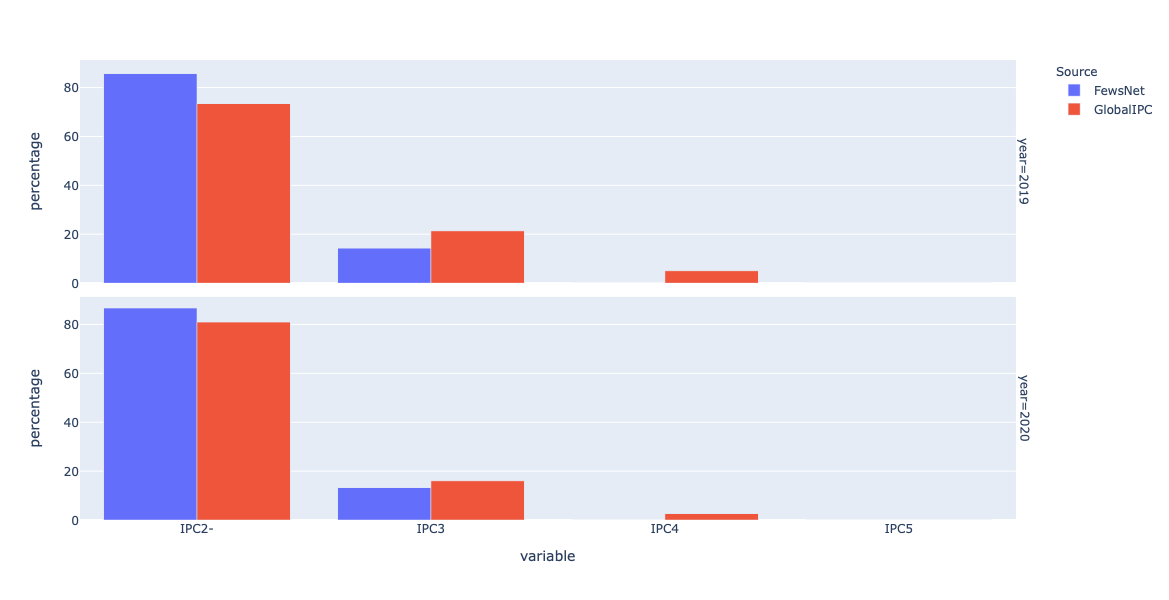

In [726]:
fig=px.bar(df_ysm,x="variable",y="percentage",color="Source",facet_row="year",barmode="group",height=600,width=800) #,facet_row="year"
fig.update_xaxes(ticktext=["IPC2-","IPC3","IPC4","IPC5"],tickvals=["CS_2-_perc","CS_3_perc","CS_4_perc","CS_5_perc"])
fig.show()

In [727]:
df_cady[(df_cady.Source=="GlobalIPC")][[f"CS_{i}_perc" for i in range(1,6)]].sum()/len(df_cady[df_cady.Source=="GlobalIPC"])

CS_1_perc    41.00
CS_2_perc    32.25
CS_3_perc    22.50
CS_4_perc     4.25
CS_5_perc     0.00
dtype: float64

In [728]:
# labels = [f"CS_{i}_perc" for i in range(1,6)]
# men_means = df_cadyg[(df_cadyg.Source=="GlobalIPC")][[f"CS_{i}_perc" for i in range(1,6)]].values[0]
# # print(men_means.values[0])
# women_means = df_cadyg[(df_cadyg.Source=="FewsNet")][[f"CS_{i}_perc" for i in range(1,6)]].values[0]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='GlobalIPC')
# rects2 = ax.bar(x + width/2, women_means, width, label='FewsNet')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

In [729]:
df_cady

,ADMIN1,date,Country Population,pop_CS,CS_1,CS_1_perc,CS_2,CS_2_perc,CS_3,CS_3_perc,...,CS_2-,CS_2-_perc,ML1_3+,ML1_3+_perc,ML1_2-,ML1_2-_perc,ML2_3+,ML2_3+_perc,ML2_2-,ML2_2-_perc
1,Afar,2019-10-01,112078686.0,2149607.0,0.0,0.000000,1279771.0,59.535115,869836.0,40.464885,...,1279771.0,59.535115,869836.0,40.464885,1279771.0,59.535115,869836.0,40.464885,1279771.0,59.535115
7,Afar,2019-09-01,112079000.0,1513546.0,620157.0,40.000000,520180.0,36.000000,313633.0,21.000000,...,1140337.0,75.342077,476948.0,31.511959,1036598.0,68.488041,341222.0,22.207181,1195317.0,77.792819
2,Amhara,2019-10-01,112078686.0,24595678.0,14526586.0,59.061539,9486141.0,38.568325,582951.0,2.370136,...,24012727.0,97.629864,0.0,0.000000,24595678.0,100.000000,3435263.0,13.966938,21160415.0,86.033062
8,Amhara,2019-09-01,112079000.0,3457931.0,1763232.0,53.000000,871182.0,26.000000,594367.0,15.000000,...,2634414.0,76.184690,506654.0,14.651941,2951278.0,85.348088,903558.0,25.942982,2579303.0,74.057018
7,Oromia,2019-10-01,112078686.0,42715654.0,27272426.0,63.846444,6191962.0,14.495768,9251266.0,21.657789,...,33464388.0,78.342211,8025229.0,18.787560,34690425.0,81.212440,9251266.0,21.657789,33464388.0,78.342211
8,SNNP,2019-10-01,112078686.0,22871531.0,12337603.0,53.943057,9256369.0,40.471139,1277559.0,5.585804,...,21593972.0,94.414196,0.0,0.000000,22871531.0,100.000000,3884191.0,16.982645,18987340.0,83.017355
9,Somali,2019-10-01,112078686.0,7016777.0,0.0,0.000000,2129864.0,30.353879,4886913.0,69.646121,...,2129864.0,30.353879,1634928.0,23.300270,5381849.0,76.699730,1389741.0,19.805974,5627036.0,80.194026
11,Somali,2019-09-01,112079000.0,5158000.0,1474153.0,27.000000,1906823.0,38.000000,1533970.0,30.000000,...,3380976.0,65.548197,1501218.0,29.104653,3656783.0,70.895366,1584274.0,30.005184,3695727.0,69.994816
10,Tigray,2019-10-01,112078686.0,6046935.0,3540435.0,58.549249,1445414.0,23.903250,1061086.0,17.547501,...,4985849.0,82.452499,0.0,0.000000,6046935.0,100.000000,1910295.0,31.591128,4136640.0,68.408872
12,Tigray,2019-09-01,112079000.0,1499302.0,684329.0,44.000000,413821.0,29.000000,369046.0,24.000000,...,1098150.0,73.244083,196353.0,13.096294,1302949.0,86.903706,258579.0,17.154156,1248804.0,82.845778


In [730]:
df_cs=df_cad[["Source","ADMIN1","year"]+[f"CS_{i}_perc" for i in range(1,6)]]

In [731]:
df_cs

,Source,ADMIN1,year,CS_1_perc,CS_2_perc,CS_3_perc,CS_4_perc,CS_5_perc
1,FewsNet,Afar,2019,0.000000,59.535115,40.464885,0.0,0.0
7,GlobalIPC,Afar,2019,40.000000,36.000000,21.000000,3.0,0.0
2,FewsNet,Amhara,2019,59.061539,38.568325,2.370136,0.0,0.0
8,GlobalIPC,Amhara,2019,53.000000,26.000000,15.000000,6.0,0.0
7,FewsNet,Oromia,2019,63.846444,14.495768,21.657789,0.0,0.0
8,FewsNet,SNNP,2019,53.943057,40.471139,5.585804,0.0,0.0
9,FewsNet,Somali,2019,0.000000,30.353879,69.646121,0.0,0.0
11,GlobalIPC,Somali,2019,27.000000,38.000000,30.000000,5.0,0.0
10,FewsNet,Tigray,2019,58.549249,23.903250,17.547501,0.0,0.0
12,GlobalIPC,Tigray,2019,44.000000,29.000000,24.000000,3.0,0.0


In [732]:
df_csm=df_cs.melt(id_vars=["Source","ADMIN1","year"],value_name="percentage")

In [733]:
df_csm.percentage=df_csm.percentage*100

In [734]:
df_csm

,Source,ADMIN1,year,variable,percentage
0,FewsNet,Afar,2019,CS_1_perc,0.000000
1,GlobalIPC,Afar,2019,CS_1_perc,4000.000000
2,FewsNet,Amhara,2019,CS_1_perc,5906.153919
3,GlobalIPC,Amhara,2019,CS_1_perc,5300.000000
4,FewsNet,Oromia,2019,CS_1_perc,6384.644374
...,...,...,...,...,...
105,GlobalIPC,SNNP,2020,CS_5_perc,0.000000
106,FewsNet,Somali,2020,CS_5_perc,0.000000
107,GlobalIPC,Somali,2020,CS_5_perc,0.000000
108,FewsNet,Tigray,2020,CS_5_perc,0.000000


In [735]:
df_fews[df_fews.date.dt.year==2020].ML2_4.unique()

array([0.])

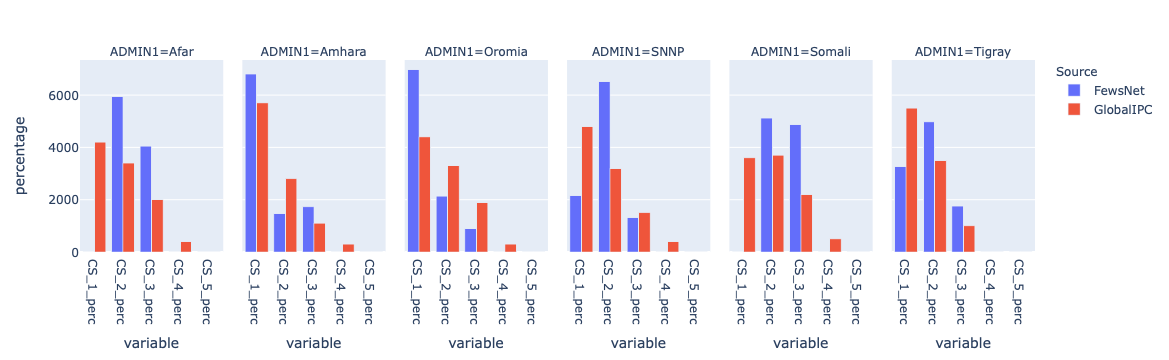

In [736]:
px.bar(df_csm[df_csm.year==2020],x="variable",y="percentage",color="Source",facet_col="ADMIN1",barmode="group",height=300,width=1200) #,facet_row="year"

<BarContainer object of 5 artists>

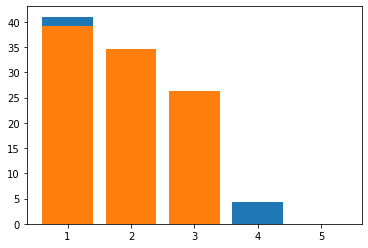

In [737]:
ax=plt.subplot(111)
ax.bar(range(1,6),df_cady[(df_cady.Source=="GlobalIPC")][[f"CS_{i}_perc" for i in range(1,6)]].sum()/len(df_cady[df_cady.Source=="GlobalIPC"]))
ax.bar(range(1,6),df_cady[(df_cady.Source=="FewsNet")][[f"CS_{i}_perc" for i in range(1,6)]].sum()/len(df_cady[df_cady.Source=="FewsNet"]))

In [769]:
import geopandas as gpd
from mapclassify import UserDefined
import mapclassify

In [771]:
mapclassify.__version__

'2.3.0'

In [739]:
def plot_aff_collist(df_d,cols,shape_path="Data/ET_Admin1_OCHA_2019/eth_admbnda_adm1_csa_bofed_20190827.shp"):
    colp_num=2
    rows=len(cols) // colp_num
    rows+=len(cols) % colp_num
    position = range(1,len(cols) + 1)

    gdf = gpd.read_file(shape_path)
    df_geo=gdf[["ADM1_EN","geometry"]].merge(df_d,left_on="ADM1_EN",right_on="ADMIN1",how="left")
    colors = len(pd.unique(df_geo[cols].values.ravel()))
    cmap = 'Blues'
    figsize = (16, 10)
    scheme = "UserDefined"#"natural_breaks"#'equalinterval'
    fig = plt.figure(1,figsize=(16,6*rows))
    for i,c in enumerate(cols):#range(len(cols)):
  # add every single subplot to the figure with a for loop

        ax = fig.add_subplot(rows,colp_num,position[i])
        df_geo.plot(c, ax=ax,cmap=cmap, figsize=figsize, k = colors,  legend=True,scheme=scheme,classification_kwds=dict(bins=[0,10,20,30,40,50,60,70,80,90,100]))#,missing_kwds={"color":"lightgrey"}) # scheme = scheme,#, figsize=(10, 10),edgecolor='gray',ax=axis,
#                 #    legend=True,
#                 #    legend_kwds={'label': "Cases per 100,000 people",'orientation': "horizontal"},
#                    scheme='Quantiles',k=len(df_geo) scheme="User_Defined", 
        gdf.boundary.plot(linewidth=0.2,ax=ax)

        ax.axis("off")
        plt.title(c)
        if not df_geo[c].isnull().values.all():
            leg = ax.get_legend()

            for lbl in leg.get_texts():
                label_text = lbl.get_text()
            #                 print(label_text)
                upper = label_text.split(",")[-1].rstrip(']')

            #             print("f",upper)
                try:
                    new_text = f'{float(upper):,.2f}'
                except:
                    new_text=upper
                lbl.set_text(new_text)



    plt.show()

In [740]:
import seaborn as sns

In [741]:
for i in range(1,6):
    df_comb[f"diffML1_{i}"]=df_comb[f'ML1_{i}_perc']-df_comb[f'CS_{i}_perc']
df_comb[f"diffML3+"]=df_comb[f'ML1_3+_perc']-df_comb[f'CS_3+_perc']

In [742]:
a=df_comb[(df_comb.date=="2020-08") & (df_comb.Source=="FewsNet")]

In [743]:
a.value_counts("CS_3_perc").sort_index()

CS_3_perc
0.000000     5
8.905066     1
13.227755    1
17.270559    1
17.547501    1
40.464885    1
48.799613    1
dtype: int64

In [744]:
a.value_counts("diffML1_3").sort_index()

diffML1_3
-8.662175      1
-8.201144      1
 0.000000      5
 14.133477     1
 26.883967     1
 48.539524     1
 100.000000    1
dtype: int64

In [745]:
a.value_counts("diffML3+").sort_index()

diffML3+
-8.662175      1
-8.201144      1
 0.000000      5
 14.133477     1
 26.883967     1
 48.539524     1
 100.000000    1
dtype: int64

In [746]:
a[["ADMIN1","diffML3+"]]

,ADMIN1,diffML3+
11,Addis Ababa,0.000000
12,Afar,48.539524
13,Amhara,-8.201144
14,Benishangul Gumz,0.000000
15,Dire Dawa,0.000000
16,Gambela,0.000000
17,Harari,100.000000
18,Oromia,14.133477
19,SNNP,-8.662175
20,Somali,26.883967


In [747]:
df_fewsa=pd.read_csv("Data/FewsNetPopulation/ethiopia_admin1_fewsnet_population_20090701_20200801.csv")

In [748]:
for status in ["CS","ML1","ML2"]:
    for i in range(1,6):
        c=f"{status}_{i}"
        df_fewsa[f"{c}_perc"]=df_fewsa[c]/df_fewsa[f"pop_{status}"]*100
#     df_fews[f'perc_{status}3+']=df_fews[f'{status}3+']/df_fews[f'pop_{status}']*100
#         df_ipcp[f"perc_{c}_miss"]=df_fews[c]/df_fews[f"Country Population"]*100
    df_fewsa[f'{status}_3+']=df_fewsa[[f'{status}_{i}' for i in range(3,6)]].sum(axis=1)
    df_fewsa[f'{status}_3+_perc']=df_fewsa[f'{status}_3+']/df_fewsa[f'pop_{status}']*100
df_fewsa[f"diffML3+"]=df_fewsa[f'ML1_3+_perc']-df_fewsa[f'CS_3+_perc']
for i in range(1,6):
    df_fewsa[f"diffML1_{i}"]=df_fewsa[f'ML1_{i}_perc']-df_fewsa[f'CS_{i}_perc']

In [749]:
df_fewsa.value_counts("CS_3_perc").sort_index()

CS_3_perc
0.000000      239
1.441450        1
2.370133        1
2.370134        2
2.370136        1
             ... 
82.365742       2
82.365823       1
85.226066       1
85.226083       1
100.000000     30
Length: 131, dtype: int64

In [750]:
df_fewsa.value_counts("diffML1_3").sort_index()

diffML1_3
-100.000000    3
-82.365742     1
-77.795861     1
-75.102355     1
-51.460479     1
              ..
 40.672886     1
 48.539524     1
 51.756077     1
 82.365823     1
 100.000000    4
Length: 65, dtype: int64

In [751]:
df_fewsa.value_counts("diffML3+").sort_index()

diffML3+
-100.000000    3
-77.795861     1
-75.102355     1
-51.460479     1
-49.259436     1
              ..
 35.215810     1
 48.539524     1
 51.756077     1
 82.365823     1
 100.000000    4
Length: 61, dtype: int64

In [755]:
a=df_fewsa[(df_fewsa.date=="2020-06-01")&(df_fewsa.ADM1_EN=="Harari")]

In [756]:
a

,Unnamed: 0,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,...,ML2_4_perc,ML2_5_perc,ML2_3+,ML2_3+_perc,diffML3+,diffML1_1,diffML1_2,diffML1_3,diffML1_4,diffML1_5
424,424,2020-06-01,Harari,260022,293500,0.0,293500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,0.0,-100.0,100.0,0.0,0.0


In [757]:
a[["date","ADM1_EN","ML1_3_perc","ML1_4_perc","CS_3_perc","CS_4_perc","CS_3","CS_4","ML1_3","ML1_4","diffML3+"]]

,date,ADM1_EN,ML1_3_perc,ML1_4_perc,CS_3_perc,CS_4_perc,CS_3,CS_4,ML1_3,ML1_4,diffML3+
424,2020-06-01,Harari,100.0,0.0,0.0,0.0,0.0,0.0,293500.0,0.0,100.0


In [647]:
df_fewsa[df_fewsa["diffML3+"]>=40][["date","ADM1_EN","diffML3+"]]

,date,ADM1_EN,diffML3+
5,2009-07-01,Gambela,82.365823
26,2010-01-01,Dire Dawa,100.000000
28,2010-01-01,Harari,100.000000
162,2013-01-01,SNNP,51.756077
424,2020-06-01,Harari,100.000000
430,2020-08-01,Afar,48.539524
435,2020-08-01,Harari,100.000000


In [767]:
df_fewsa[df_fewsa["ML1_3_perc"]>=90][["date","ADM1_EN","ML1_3_perc"]].date.unique()

array(['2010-01-01', '2010-04-01', '2010-07-01', '2011-04-01',
       '2011-07-01', '2012-01-01', '2012-04-01', '2012-07-01',
       '2013-01-01', '2013-04-01', '2013-07-01', '2015-10-01',
       '2016-02-01', '2016-06-01', '2017-06-01', '2020-06-01',
       '2020-08-01'], dtype=object)

In [766]:
df_fewsa[df_fewsa["ML1_3_perc"]>=90][["date","ADM1_EN","ML1_3_perc"]]

,date,ADM1_EN,ML1_3_perc
26,2010-01-01,Dire Dawa,100.0
28,2010-01-01,Harari,100.0
39,2010-04-01,Harari,100.0
44,2010-07-01,Addis Ababa,100.0
48,2010-07-01,Dire Dawa,100.0
49,2010-07-01,Gambela,100.0
78,2011-04-01,Afar,100.0
83,2011-04-01,Harari,100.0
89,2011-07-01,Afar,100.0
94,2011-07-01,Harari,100.0


In [653]:
len(df_fewsa[df_fewsa.CS_3_perc>=40])

80

(0.0, 10.0)

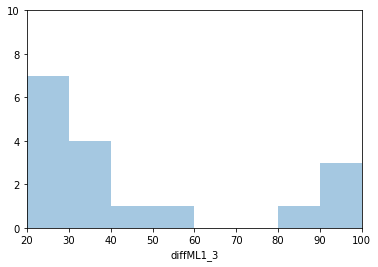

In [622]:
sns.distplot(df_fewsa.diffML1_3,kde=False)
plt.xlim(20,100)
plt.ylim(0,10)

/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/mapclassify/classifiers.py:888: RuntimeWarning:

invalid value encountered in double_scalars

/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/mapclassify/classifiers.py:888: RuntimeWarning:

invalid value encountered in double_scalars



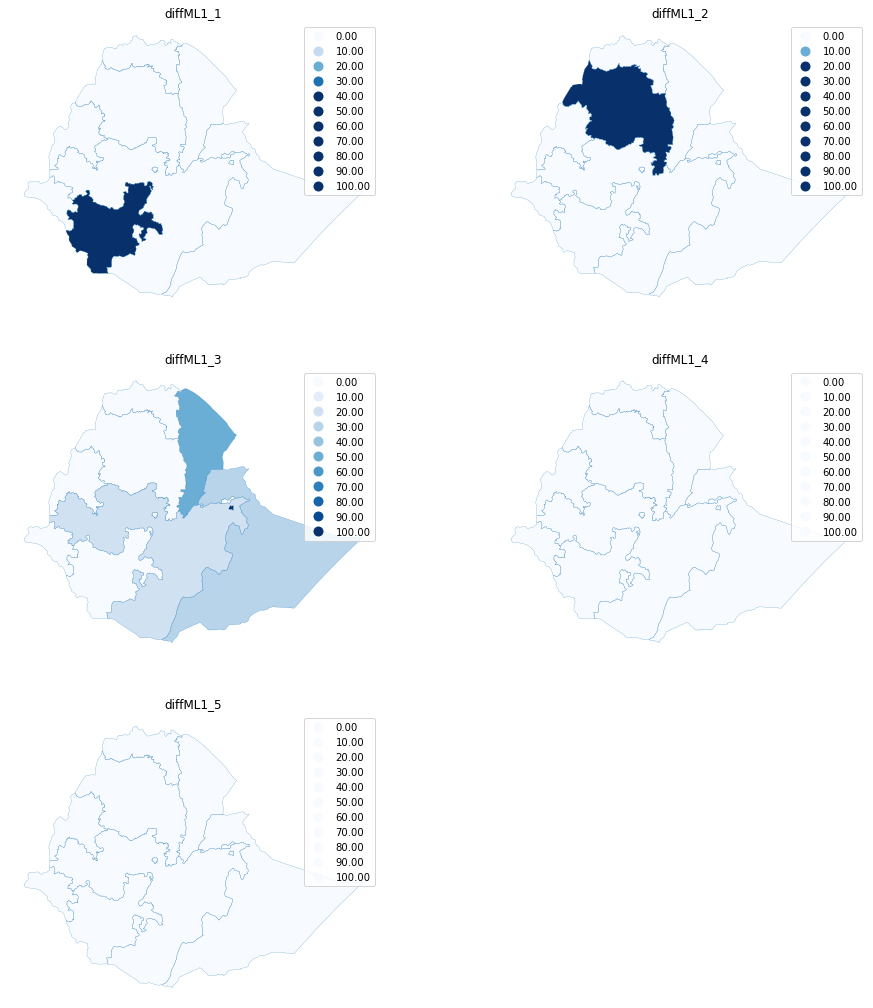

In [605]:
plot_aff_collist(df_comb[(df_comb.date=="2020-08") & (df_comb.Source=="FewsNet")],[f"diffML1_{i}" for i in range(1,6)])

/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/mapclassify/classifiers.py:888: RuntimeWarning:

invalid value encountered in double_scalars

/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/mapclassify/classifiers.py:888: RuntimeWarning:

invalid value encountered in double_scalars



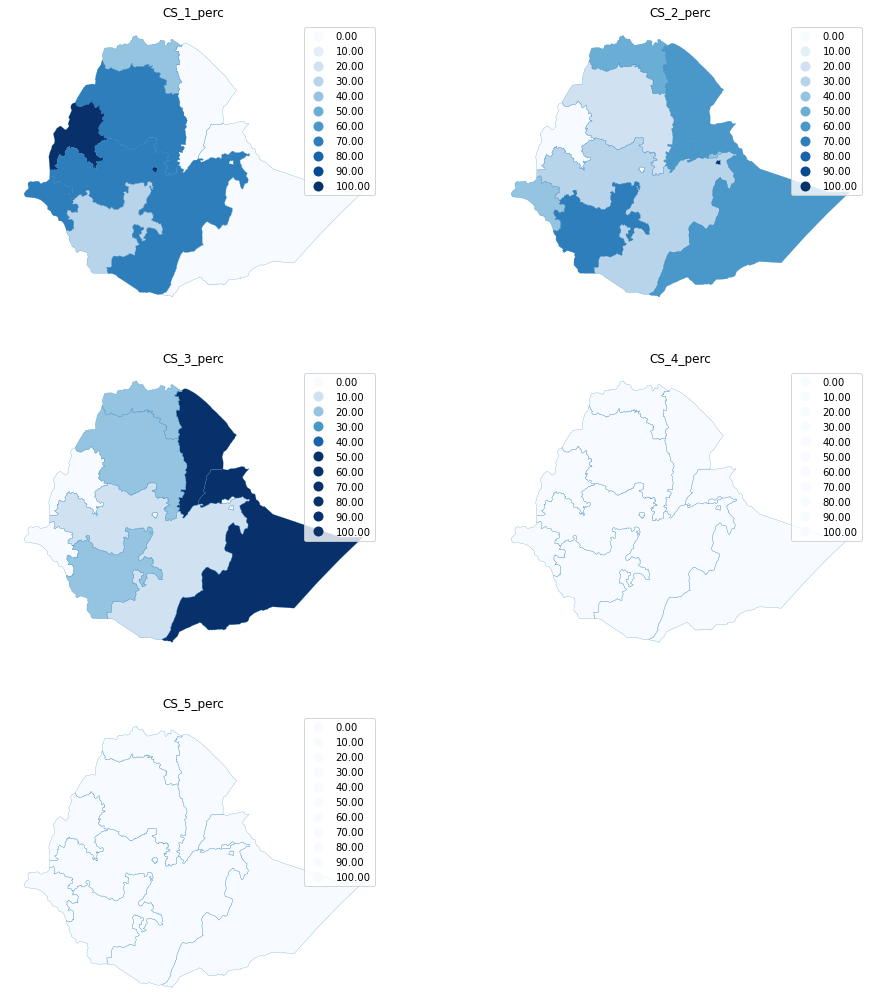

In [570]:
plot_aff_collist(df_comb[(df_comb.date=="2020-08") & (df_comb.Source=="FewsNet")],[f"CS_{i}_perc" for i in range(1,6)])